In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns
%matplotlib inline
import os


In [2]:
os.getcwd()

'C:\\Users\\noble'

In [3]:
os.chdir ('C:\\Noble\\Training\\Top Mentor\\Training\\LMS\\08 Jan 2023\\Batch 74 Day 38\\Project 12 Flight Price Predict Heroku\\')

In [4]:
df=pd.read_excel("Data_Train.xlsx")
display(df)


Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [5]:
import pandas_profiling as pf
display(pf.ProfileReport(df))


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
len(df)

10683

In [8]:
display (df.shape)

(10683, 11)

In [9]:
display (df.dtypes )

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
display (df.isna().sum() )

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.dropna(how='any',inplace=True)
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
display (df.shape)

(10682, 11)

In [13]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [14]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [15]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey']) 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/04/2019' in DD/MM/YYYY format. Pro

In [16]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day 
df['Day_of_Journey']

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: Day_of_Journey, Length: 10682, dtype: int64

In [18]:
df['Day_of_Journey'].head(50)

0     24
1      5
2      6
3      5
4      3
5     24
6      3
7      3
8      3
9     27
10     6
11    18
12    24
13     5
14    24
15     3
16    15
17     6
18     6
19    27
20     3
21    21
22     4
23     5
24     5
25     6
26     6
27    15
28    18
29    15
30    18
31     5
32     4
33    15
34    18
35    27
36    21
37    18
38     3
39     6
40    21
41    15
42    18
43     5
44    21
45    24
46    27
47     5
48    15
49    27
Name: Day_of_Journey, dtype: int64

In [19]:
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month # Month Column 
display(df)


Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore   New Delhi   
1        Air India      2019-01-05   Kolkata    Banglore   
2      Jet Airways      2019-09-06     Delhi      Cochin   
3           IndiGo      2019-12-05   Kolkata    Banglore   
4           IndiGo      2019-01-03  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      2019-09-04   Kolkata    Banglore   
10679    Air India      2019-04-27   Kolkata    Banglore   
10680  Jet Airways      2019-04-27  Banglore       Delhi   
10681      Vistara      2019-01-03  Banglore   New Delhi   
10682    Air India      2019-09-05     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  Day_of_Journey  Month_of_Journey  
0             No info   3897              24                 3  
1             No info   7662               5                 1  
2             No info  13882               6                 9  
3             No info   6218               5                12  
4             No info  13302               3                 1  
...               ...    ...             ...               ...  
10678         No info   4107               4                 9  
10679         No info   4145              27                 4  
10680         No info   7229              27                 4  
10681         No info  12648               3                 1  
10682         No info  11753               5                 9  

[10682 rows x 13 columns]

In [20]:
df.drop(["Date_of_Journey"],axis=1,inplace=True)
display(df.head())


Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  Day_of_Journey  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897              24   
1         13:15   7h 25m     2 stops         No info   7662               5   
2  04:25 10 Jun      19h     2 stops         No info  13882               6   
3         23:30   5h 25m      1 stop         No info   6218               5   
4         21:35   4h 45m      1 stop         No info  13302               3   

   Month_of_Journey  
0                 3  
1                 1  
2                 9  
3                12  
4                 1

In [21]:
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_hr']

0        22
1         5
2         9
3        18
4        16
         ..
10678    19
10679    20
10680     8
10681    11
10682    10
Name: Dep_hr, Length: 10682, dtype: int64

In [22]:
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
df['Dep_min']

0        20
1        50
2        25
3         5
4        50
         ..
10678    55
10679    45
10680    20
10681    30
10682    55
Name: Dep_min, Length: 10682, dtype: int64

In [23]:
display(df.head())

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  Day_of_Journey  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897              24   
1         13:15   7h 25m     2 stops         No info   7662               5   
2  04:25 10 Jun      19h     2 stops         No info  13882               6   
3         23:30   5h 25m      1 stop         No info   6218               5   
4         21:35   4h 45m      1 stop         No info  13302               3   

   Month_of_Journey  Dep_hr  Dep_min  
0                 3      22       20  
1                 1       5       50  
2                 9       9       25  
3                12      18        5  
4                 1      16       50

In [24]:
df.drop(["Dep_Time"],axis=1,inplace=True)
display(df.head())


Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  Day_of_Journey  \
0   2h 50m    non-stop         No info   3897              24   
1   7h 25m     2 stops         No info   7662               5   
2      19h     2 stops         No info  13882               6   
3   5h 25m      1 stop         No info   6218               5   
4   4h 45m      1 stop         No info  13302               3   

   Month_of_Journey  Dep_hr  Dep_min  
0                 3      22       20  
1                 1       5       50  
2                 9       9       25  
3                12      18        5  
4                 1      16       50

In [25]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
display(df.head())


Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  Day_of_Journey  \
0   2h 50m    non-stop         No info   3897              24   
1   7h 25m     2 stops         No info   7662               5   
2      19h     2 stops         No info  13882               6   
3   5h 25m      1 stop         No info   6218               5   
4   4h 45m      1 stop         No info  13302               3   

   Month_of_Journey  Dep_hr  Dep_min  Arrival_hr  Arrival_min  
0                 3      22       20           1           10  
1                 1       5       50          13           15  
2                 9       9       25           4           25  
3                12      18        5          23           30  
4                 1      16       50          21           35

In [26]:
df.drop(["Arrival_Time"],axis=1,inplace=True)
display(df.head())


Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Day_of_Journey  Month_of_Journey  \
0    non-stop         No info   3897              24                 3   
1     2 stops         No info   7662               5                 1   
2     2 stops         No info  13882               6                 9   
3      1 stop         No info   6218               5                12   
4      1 stop         No info  13302               3                 1   

   Dep_hr  Dep_min  Arrival_hr  Arrival_min  
0      22       20           1           10  
1       5       50          13           15  
2       9       25           4           25  
3      18        5          23           30  
4      16       50          21           35

In [27]:
display (df['Duration'])

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [28]:
duration=df['Duration'].str.split(' ',expand=True) 
display (duration)


0     1
0       2h   50m
1       7h   25m
2      19h  None
3       5h   25m
4       4h   45m
...    ...   ...
10678   2h   30m
10679   2h   35m
10680   3h  None
10681   2h   40m
10682   8h   20m

[10682 rows x 2 columns]

In [29]:
duration[1]

0         50m
1         25m
2        None
3         25m
4         45m
         ... 
10678     30m
10679     35m
10680    None
10681     40m
10682     20m
Name: 1, Length: 10682, dtype: object

In [30]:
duration[1].fillna('00m',inplace=True)  
display (duration)


0    1
0       2h  50m
1       7h  25m
2      19h  00m
3       5h  25m
4       4h  45m
...    ...  ...
10678   2h  30m
10679   2h  35m
10680   3h  00m
10681   2h  40m
10682   8h  20m

[10682 rows x 2 columns]

In [31]:
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) 
display (df['duration_hr'])


0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: duration_hr, Length: 10682, dtype: object

In [32]:
df['duration_min']=duration[1].apply(lambda x: x[:-1]) 
display (df['duration_min']) 


0        50
1        25
2        00
3        25
4        45
         ..
10678    30
10679    35
10680    00
10681    40
10682    20
Name: duration_min, Length: 10682, dtype: object

In [33]:
df.drop(["Duration"],axis=1,inplace=True)
display (df)


Airline    Source Destination                  Route Total_Stops  \
0           IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   
...            ...       ...         ...                    ...         ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR    non-stop   
10679    Air India   Kolkata    Banglore              CCU → BLR    non-stop   
10680  Jet Airways  Banglore       Delhi              BLR → DEL    non-stop   
10681      Vistara  Banglore   New Delhi              BLR → DEL    non-stop   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK     2 stops   

      Additional_Info  Price  Day_of_Journey  Month_of_Journey  Dep_hr  \
0             No info   3897              24                 3      22   
1             No info   7662               5                 1       5   
2             No info  13882               6                 9       9   
3             No info   6218               5                12      18   
4             No info  13302               3                 1      16   
...               ...    ...             ...               ...     ...   
10678         No info   4107               4                 9      19   
10679         No info   4145              27                 4      20   
10680         No info   7229              27                 4       8   
10681         No info  12648               3                 1      11   
10682         No info  11753               5                 9      10   

       Dep_min  Arrival_hr  Arrival_min duration_hr duration_min  
0           20           1           10           2           50  
1           50          13           15           7           25  
2           25           4           25          19           00  
3            5          23           30           5           25  
4           50          21           35           4           45  
...        ...         ...          ...         ...          ...  
10678       55          22           25           2           30  
10679       45          23           20           2           35  
10680       20          11           20           3           00  
10681       30          14           10           2           40  
10682       55          19           15           8           20  

[10682 rows x 15 columns]

In [34]:

cf.set_config_file(theme='ggplot',sharing='public',offline=True)


In [35]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [38]:
Airprices.index

Index(['Jet Airways Business', 'Jet Airways',
       'Multiple carriers Premium economy', 'Multiple carriers', 'Air India',
       'Vistara Premium economy', 'Vistara', 'GoAir', 'IndiGo', 'Air Asia',
       'SpiceJet', 'Trujet'],
      dtype='object', name='Airline')

In [39]:
Airprices.values

array([58358.66666667, 11643.92335672, 11418.84615385, 10902.67809365,
        9612.42775557,  8962.33333333,  7796.34864301,  5861.05670103,
        5673.68290307,  5590.26018809,  4338.28484108,  4140.        ])

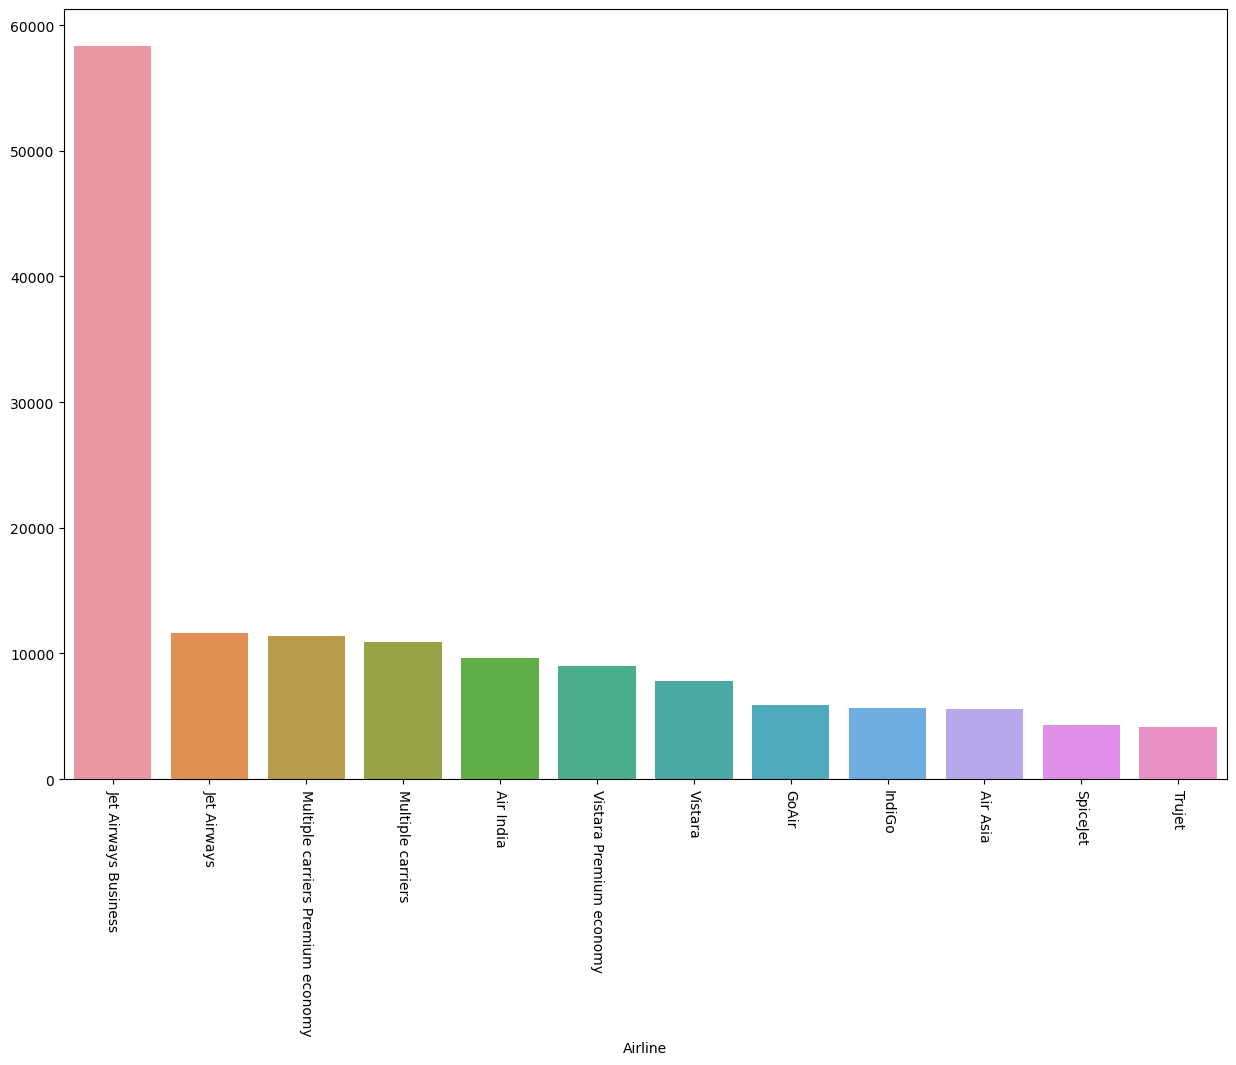

In [50]:
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x= Airprices.index, y= Airprices.values)
plt.xticks(rotation=270)
plt.show()


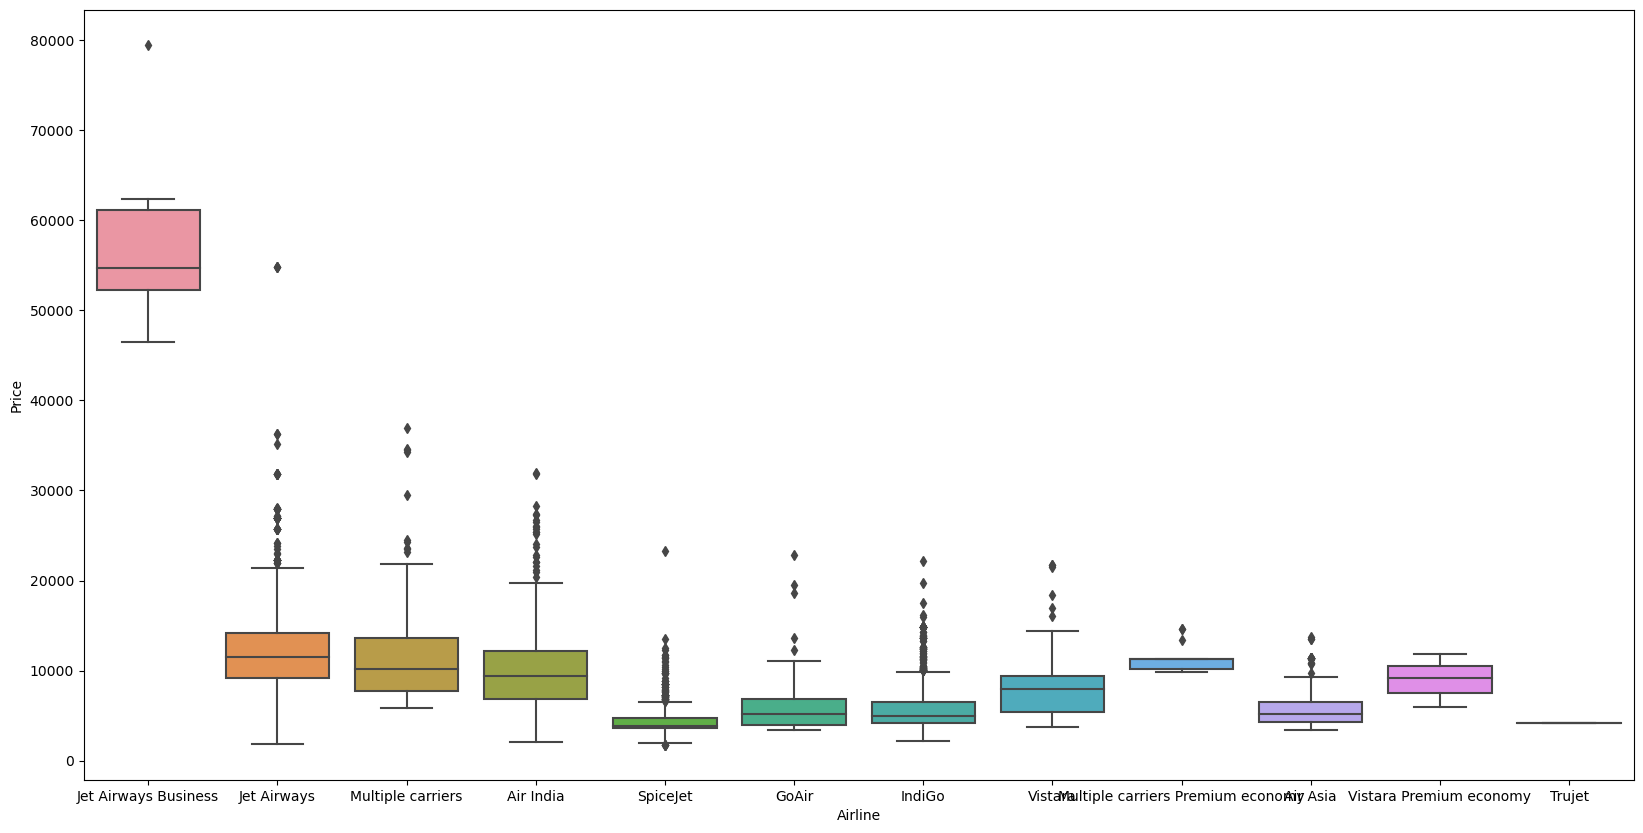

In [41]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show()


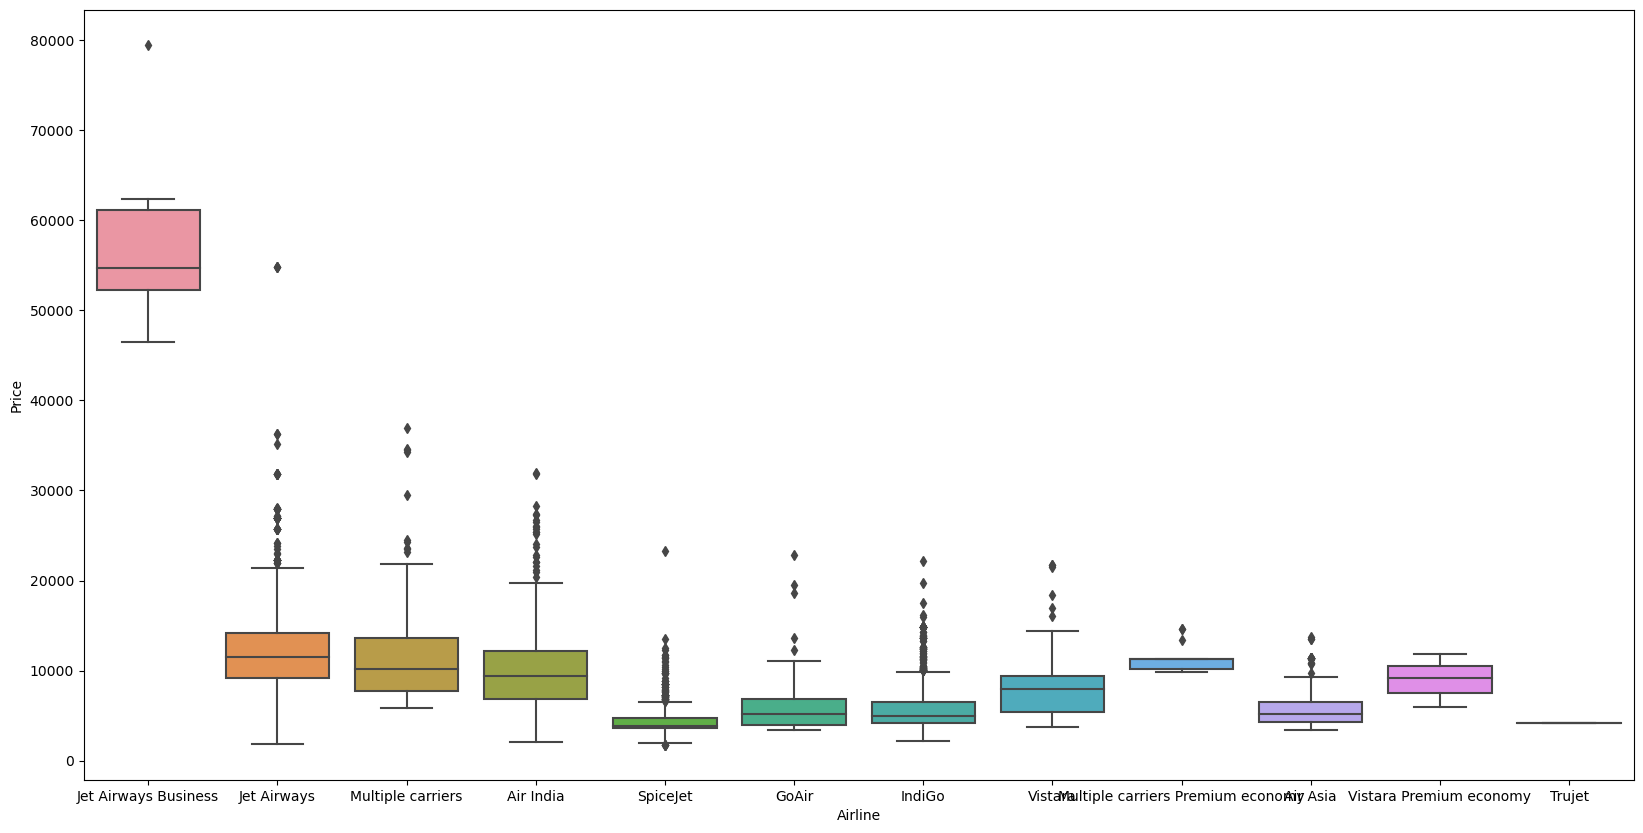

In [43]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show()


In [44]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

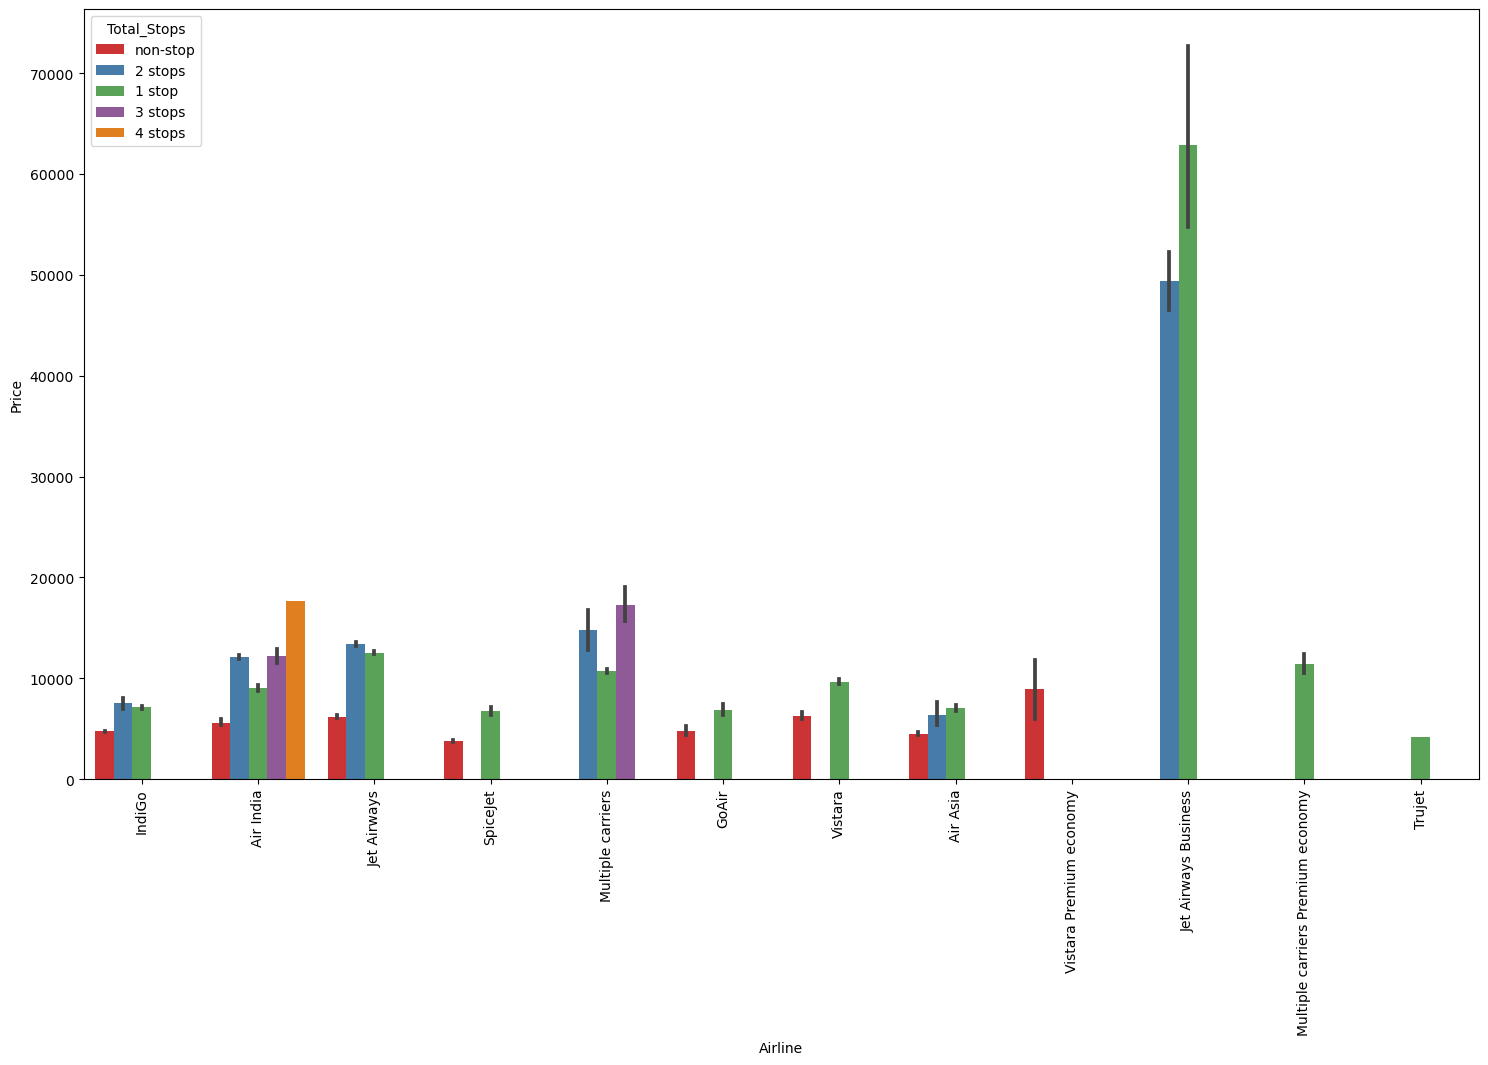

In [45]:

plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()



In [46]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

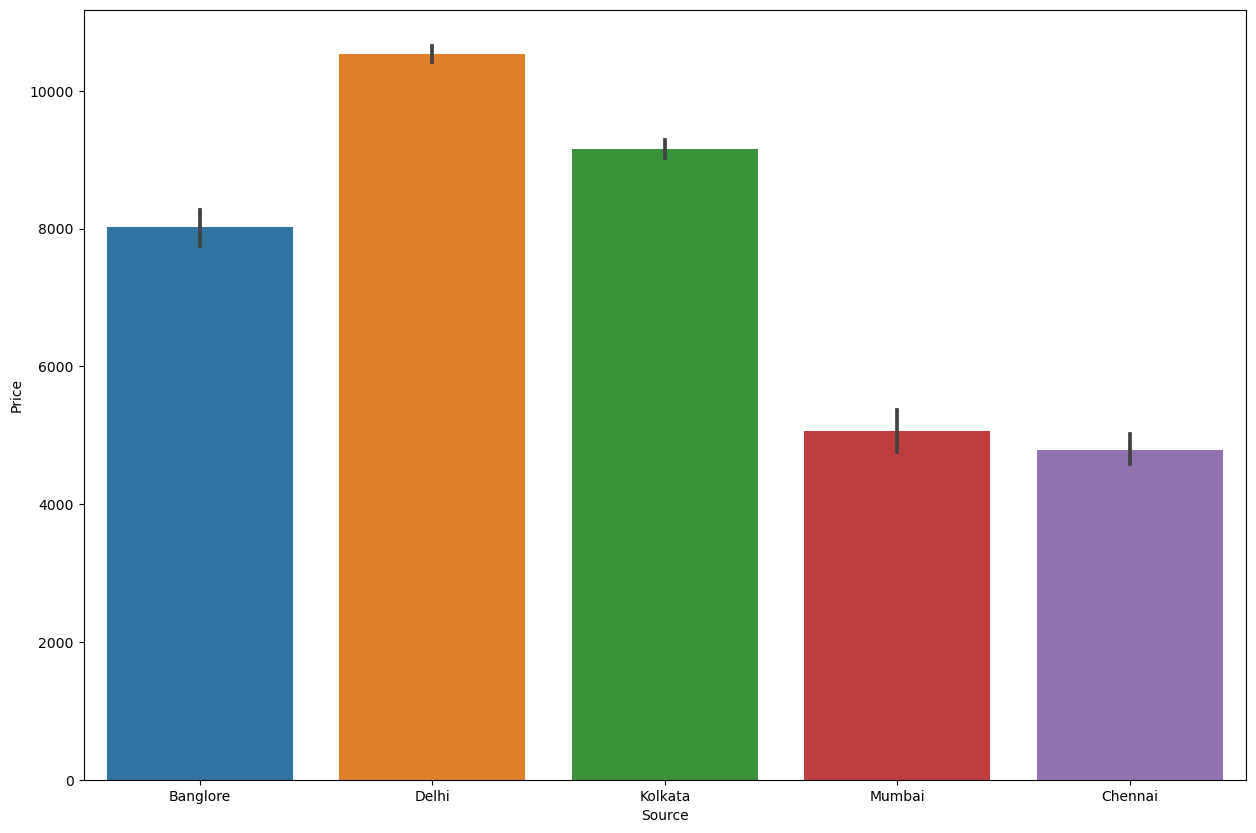

In [47]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show()


In [48]:

df['Destination'].value_counts()


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

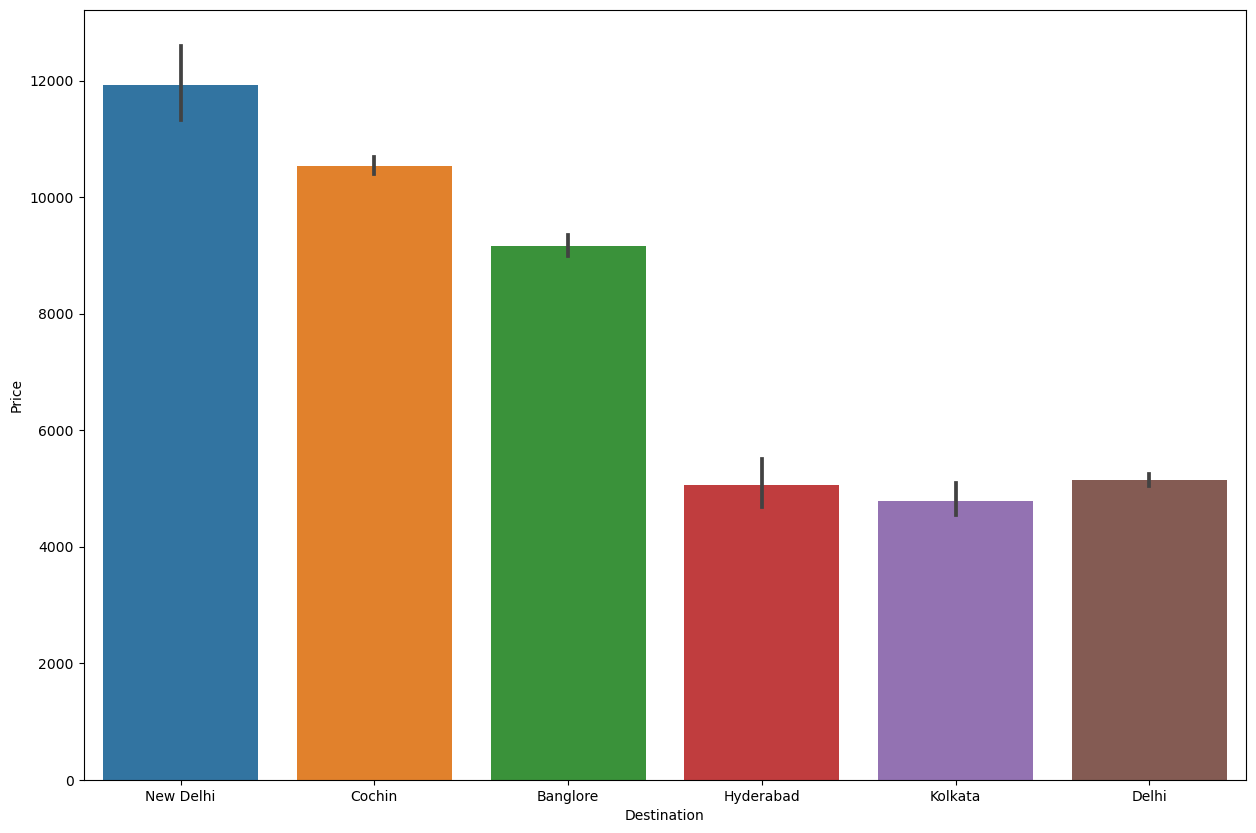

In [52]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',errorbar=('ci', 99),data=df.sort_values('Price',ascending=False))


<AxesSubplot:xlabel='Destination', ylabel='Price'>

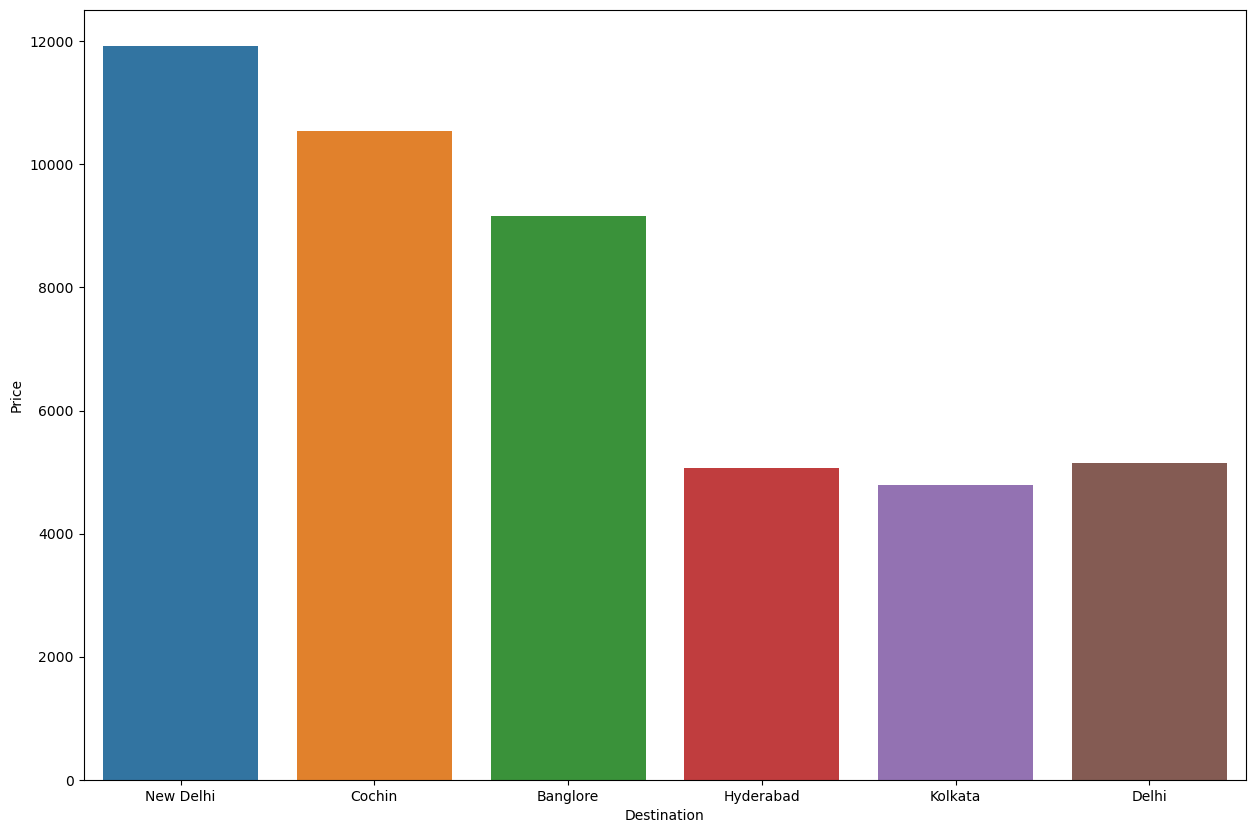

In [54]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',errorbar=None,data=df.sort_values('Price',ascending=False))


In [55]:
df

Airline    Source Destination                  Route Total_Stops  \
0           IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   
...            ...       ...         ...                    ...         ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR    non-stop   
10679    Air India   Kolkata    Banglore              CCU → BLR    non-stop   
10680  Jet Airways  Banglore       Delhi              BLR → DEL    non-stop   
10681      Vistara  Banglore   New Delhi              BLR → DEL    non-stop   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK     2 stops   

      Additional_Info  Price  Day_of_Journey  Month_of_Journey  Dep_hr  \
0             No info   3897              24                 3      22   
1             No info   7662               5                 1       5   
2             No info  13882               6                 9       9   
3             No info   6218               5                12      18   
4             No info  13302               3                 1      16   
...               ...    ...             ...               ...     ...   
10678         No info   4107               4                 9      19   
10679         No info   4145              27                 4      20   
10680         No info   7229              27                 4       8   
10681         No info  12648               3                 1      11   
10682         No info  11753               5                 9      10   

       Dep_min  Arrival_hr  Arrival_min duration_hr duration_min  
0           20           1           10           2           50  
1           50          13           15           7           25  
2           25           4           25          19           00  
3            5          23           30           5           25  
4           50          21           35           4           45  
...        ...         ...          ...         ...          ...  
10678       55          22           25           2           30  
10679       45          23           20           2           35  
10680       20          11           20           3           00  
10681       30          14           10           2           40  
10682       55          19           15           8           20  

[10682 rows x 15 columns]

In [56]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)


In [57]:
display(df['Destination'].unique())

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [58]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

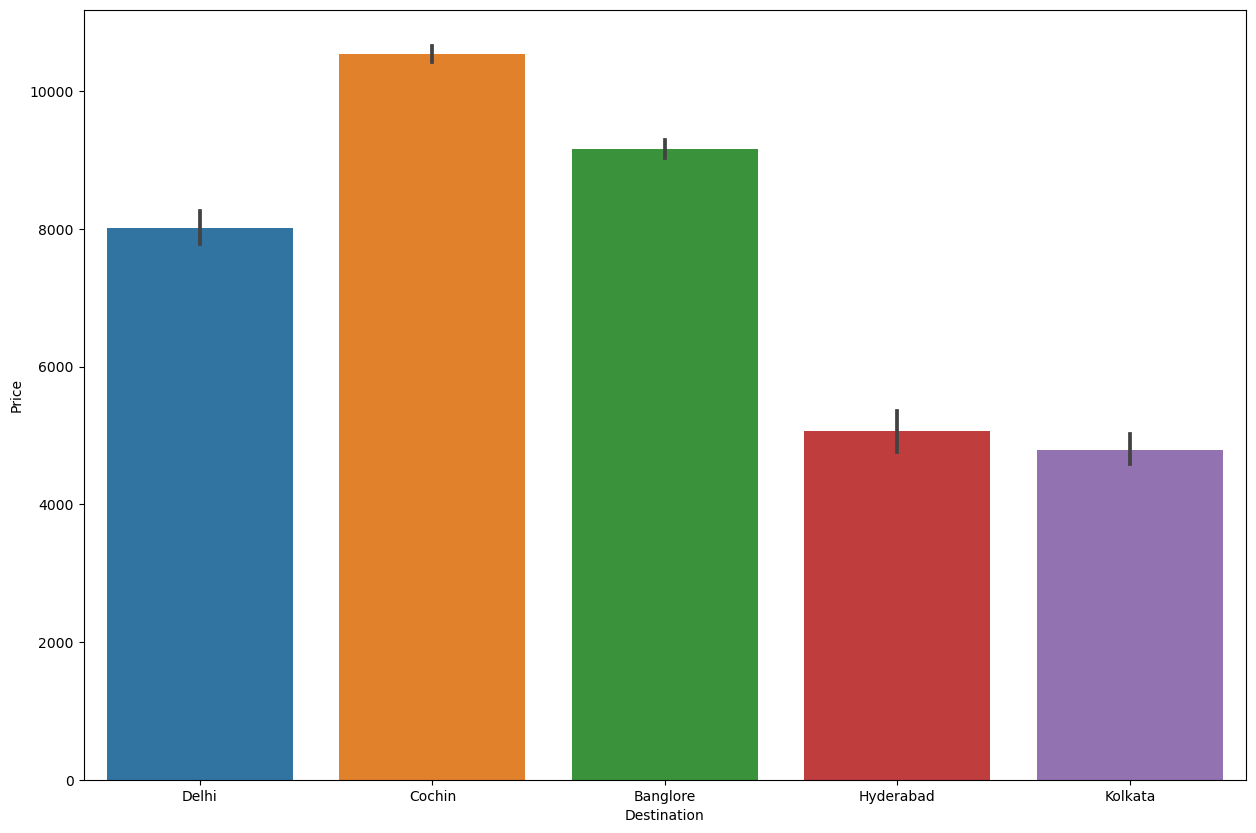

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()


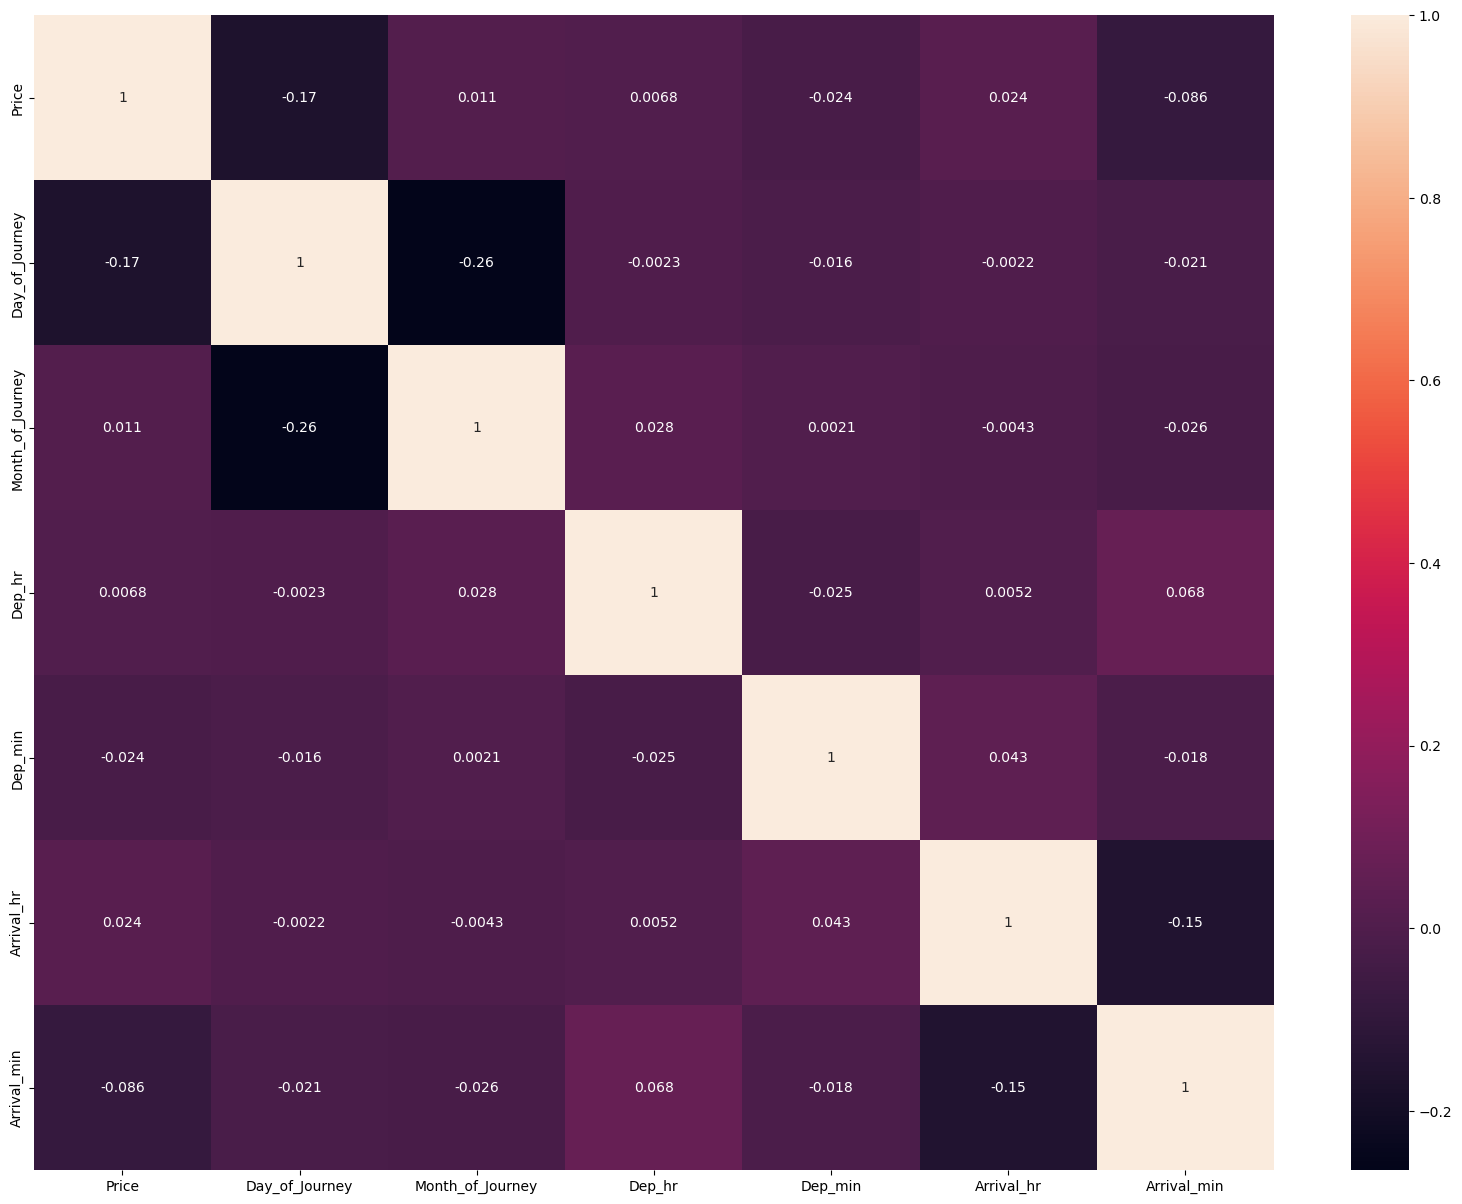

In [60]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [61]:
display (df.head(4))

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore       Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   

  Additional_Info  Price  Day_of_Journey  Month_of_Journey  Dep_hr  Dep_min  \
0         No info   3897              24                 3      22       20   
1         No info   7662               5                 1       5       50   
2         No info  13882               6                 9       9       25   
3         No info   6218               5                12      18        5   

   Arrival_hr  Arrival_min duration_hr duration_min  
0           1           10           2           50  
1          13           15           7           25  
2           4           25          19           00  
3          23           30           5           25

In [62]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
display (df.head(4))


Airline    Source Destination                  Route  Total_Stops  \
0       IndiGo  Banglore       Delhi              BLR → DEL            0   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR            2   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK            2   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR            1   

  Additional_Info  Price  Day_of_Journey  Month_of_Journey  Dep_hr  Dep_min  \
0         No info   3897              24                 3      22       20   
1         No info   7662               5                 1       5       50   
2         No info  13882               6                 9       9       25   
3         No info   6218               5                12      18        5   

   Arrival_hr  Arrival_min duration_hr duration_min  
0           1           10           2           50  
1          13           15           7           25  
2           4           25          19           00  
3          23           30           5           25

In [63]:
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
display (air_dummy)


Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0              0      0       1            0                     0   
1              1      0       0            0                     0   
2              0      0       0            1                     0   
3              0      0       1            0                     0   
4              0      0       1            0                     0   
...          ...    ...     ...          ...                   ...   
10678          0      0       0            0                     0   
10679          1      0       0            0                     0   
10680          0      0       0            1                     0   
10681          0      0       0            0                     0   
10682          1      0       0            0                     0   

       Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                      0                                  0         0       0   
1                      0                                  0         0       0   
2                      0                                  0         0       0   
3                      0                                  0         0       0   
4                      0                                  0         0       0   
...                  ...                                ...       ...     ...   
10678                  0                                  0         0       0   
10679                  0                                  0         0       0   
10680                  0                                  0         0       0   
10681                  0                                  0         0       0   
10682                  0                                  0         0       0   

       Vistara  Vistara Premium economy  
0            0                        0  
1            0                        0  
2            0                        0  
3            0                        0  
4            0                        0  
...        ...                      ...  
10678        0                        0  
10679        0                        0  
10680        0                        0  
10681        1                        0  
10682        0                        0  

[10682 rows x 11 columns]

In [64]:
source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
display (source_dest_dummy)


Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0                   0             0               0              0   
1                   0             0               1              0   
2                   0             1               0              0   
3                   0             0               1              0   
4                   0             0               0              0   
...               ...           ...             ...            ...   
10678               0             0               1              0   
10679               0             0               1              0   
10680               0             0               0              0   
10681               0             0               0              0   
10682               0             1               0              0   

       Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                       0                  1                      0   
1                       0                  0                      0   
2                       1                  0                      0   
3                       0                  0                      0   
4                       0                  1                      0   
...                   ...                ...                    ...   
10678                   0                  0                      0   
10679                   0                  0                      0   
10680                   0                  1                      0   
10681                   0                  1                      0   
10682                   1                  0                      0   

       Destination_Kolkata  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
10678                    0  
10679                    0  
10680                    0  
10681                    0  
10682                    0  

[10682 rows x 8 columns]

In [65]:
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)
display (df.head(4))


Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   
3          0      0       1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   

   Vistara  ...  Additional_Info  Price  Day_of_Journey  Month_of_Journey  \
0        0  ...          No info   3897              24                 3   
1        0  ...          No info   7662               5                 1   
2        0  ...          No info  13882               6                 9   
3        0  ...          No info   6218               5                12   

   Dep_hr  Dep_min  Arrival_hr  Arrival_min  duration_hr duration_min  
0      22       20           1           10            2           50  
1       5       50          13           15            7           25  
2       9       25           4           25           19           00  
3      18        5          23           30            5           25  

[4 rows x 34 columns]

In [66]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [67]:
display (df.shape)

(10682, 31)

In [68]:
df_test=pd.read_excel("Test_set.xlsx")
display(df_test) 


Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20         10:20       4h      1 stop   
2     DEL → BOM → COK    19:15  19:00 22 May  23h 45m      1 stop   
3     DEL → BOM → COK    08:00         21:00      13h      1 stop   
4           BLR → DEL    23:55  02:45 25 Jun   2h 50m    non-stop   
...               ...      ...           ...      ...         ...   
2666  CCU → DEL → BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
2667        CCU → BLR    14:20         16:55   2h 35m    non-stop   
2668  DEL → BOM → COK    21:50  04:25 07 Mar   6h 35m      1 stop   
2669  DEL → BOM → COK    04:00         19:15  15h 15m      1 stop   
2670  DEL → BOM → COK    04:55         19:15  14h 20m      1 stop   

                  Additional_Info  
0                         No info  
1                         No info  
2     In-flight meal not included  
3                         No info  
4                         No info  
...                           ...  
2666                      No info  
2667                      No info  
2668                      No info  
2669                      No info  
2670                      No info  

[2671 rows x 10 columns]

In [69]:

df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '21/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '18/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '21/03/2019' in DD/MM/YYYY format. Pro

In [70]:
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute


In [71]:

df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute


In [72]:

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)


In [73]:
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])


In [74]:
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

In [75]:
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)



In [76]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)
display (df_test.head(4))


Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       0            1                     0   
1          0      0       1            0                     0   
2          0      0       0            1                     0   
3          0      0       0            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Vistara  \
0                  0                                  0         0        0   
1                  0                                  0         0        0   
2                  0                                  0         0        0   
3                  1                                  0         0        0   

   Vistara Premium economy  ...  Destination_New Delhi  Total_Stops  \
0                        0  ...                      0            1   
1                        0  ...                      0            1   
2                        0  ...                      0            1   
3                        0  ...                      0            1   

   Day_of_Journey  Month_of_Journey  Dep_hr  Dep_min  Arrival_hr  Arrival_min  \
0               6                 6      17       30           4           25   
1               5                12       6       20          10           20   
2              21                 5      19       15          19            0   
3              21                 5       8        0          21            0   

   dur_hr  dur_min  
0      10       55  
1       4       00  
2      23       45  
3      13       00  

[4 rows x 28 columns]

In [77]:
print('train_shape',df.shape)
# Additional columns in training data set  'Route', 'Price','Additional_Info', can be removed later 
print('test_shape',df_test.shape)



train_shape (10682, 31)
test_shape (2671, 28)


In [79]:
x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']


In [80]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)


ExtraTreesRegressor()

In [81]:
y_predict=ET_Model.predict(x)
display (r2_score(y,y_predict))


0.9633112583301726

<AxesSubplot:>

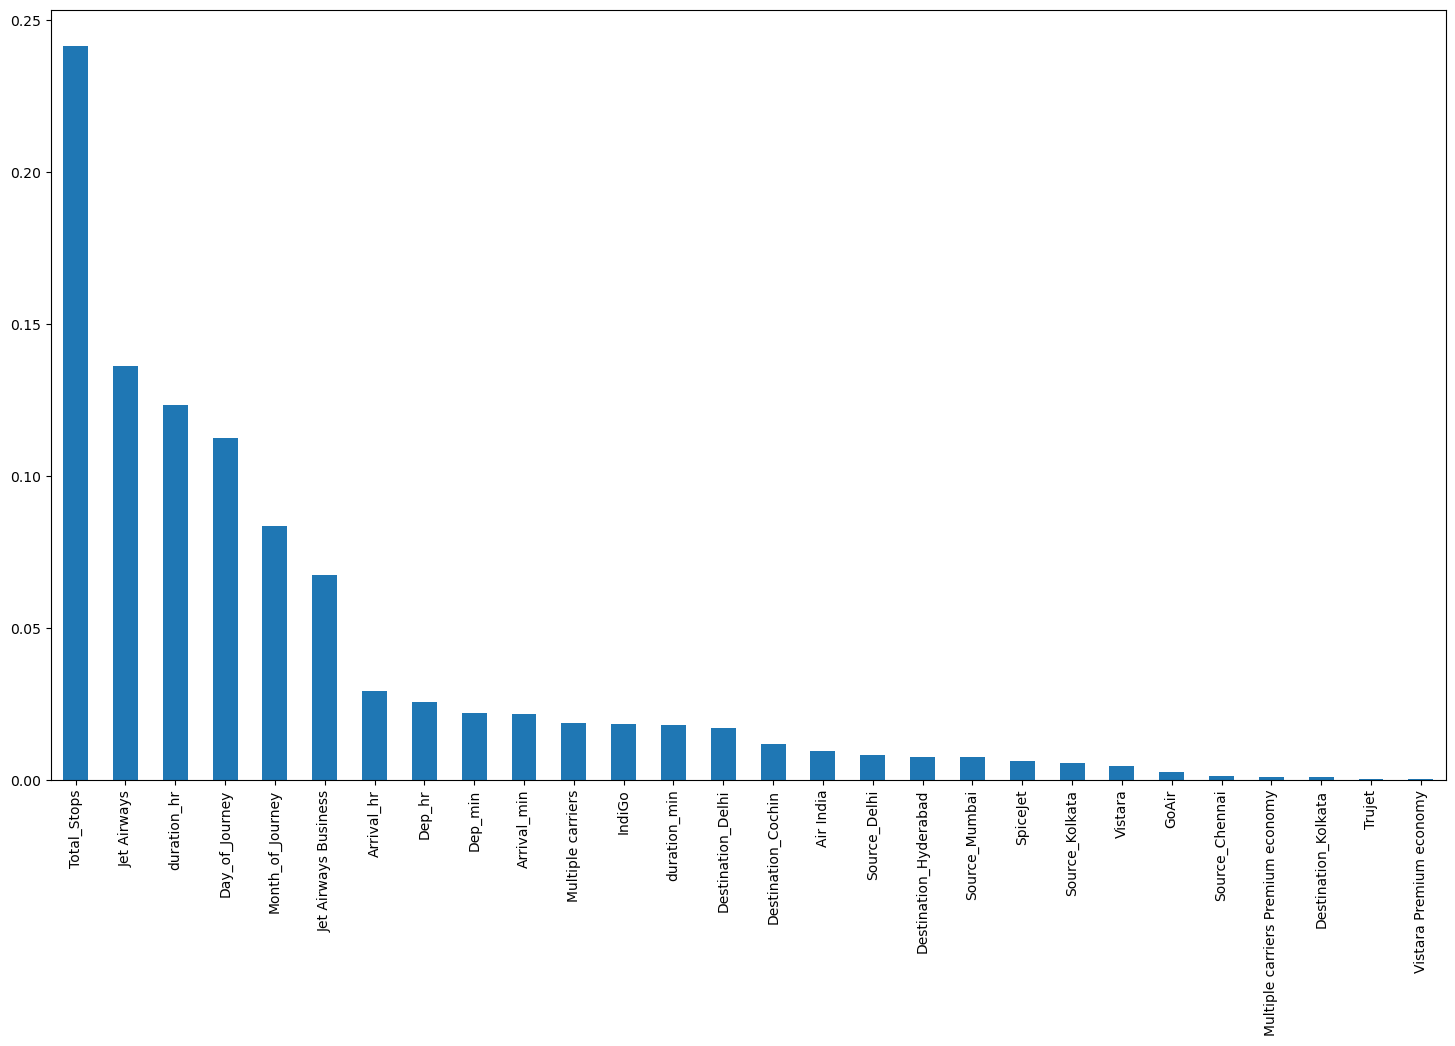

In [82]:

pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))




In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)


In [84]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)


ExtraTreesRegressor(n_estimators=120)

In [85]:
y_predict=ET_Model.predict(X_test)
from sklearn.metrics import r2_score
display (r2_score(y_test,y_predict))


0.7642733037298327

In [86]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)



0.7955172317532089

In [87]:

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)




In [88]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [89]:
rf_pred=rCV.predict(X_test)
display (rf_pred)


array([12515.02888393,  4283.28638229,  6124.22582176, ...,
       11612.49793528,  9783.16327645,  8664.9651464 ])

In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))


MAE 1157.4646728706587
MSE 3957746.5319146686


In [91]:
display (r2_score(y_test,rf_pred))

0.8072558151980812

In [92]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
cat.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



Learning rate set to 0.057463
0:	learn: 4465.7280757	total: 142ms	remaining: 2m 21s
1:	learn: 4317.7245126	total: 144ms	remaining: 1m 11s
2:	learn: 4167.9871081	total: 146ms	remaining: 48.7s
3:	learn: 4030.4839609	total: 148ms	remaining: 36.9s
4:	learn: 3906.4844760	total: 150ms	remaining: 29.8s
5:	learn: 3785.4580402	total: 151ms	remaining: 25s
6:	learn: 3673.8662552	total: 153ms	remaining: 21.6s
7:	learn: 3582.0533069	total: 154ms	remaining: 19.1s
8:	learn: 3495.5629367	total: 155ms	remaining: 17.1s
9:	learn: 3404.7478335	total: 157ms	remaining: 15.5s
10:	learn: 3325.1004431	total: 158ms	remaining: 14.2s
11:	learn: 3254.1004651	total: 160ms	remaining: 13.2s
12:	learn: 3184.6084064	total: 161ms	remaining: 12.3s
13:	learn: 3122.3064005	total: 164ms	remaining: 11.5s
14:	learn: 3067.6550706	total: 166ms	remaining: 10.9s
15:	learn: 3014.5169632	total: 168ms	remaining: 10.3s
16:	learn: 2962.4252595	total: 169ms	remaining: 9.78s
17:	learn: 2920.1931240	total: 171ms	remaining: 9.32s
18:	lear

In [93]:
cat_pred=cat.predict(X_test)
display (cat_pred)


array([12502.97869633,  3913.57282693,  5936.5002272 , ...,
       11479.15026652, 10037.36579669,  8301.20092775])

In [94]:
display (r2_score(y_test,cat_pred))

0.8273858089678572

In [95]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)


In [96]:

from lightgbm import LGBMRegressor
lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)


LGBMRegressor()

In [97]:
lgb_pred=lgb_model.predict(X_test)
display (r2_score(y_test,lgb_pred))


0.8030064936005559

In [98]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
display (r2_score(y_test,xgb_pred))


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



0.8212496825906317

In [99]:
import pickle 
# Saving model to disk
pickle.dump(cat, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))



In [100]:
deploy_df=df.drop(['Route','Additional_Info'],axis=1)

In [101]:
deploy_df.to_csv('deploy_df.csv')
display (deploy_df)


Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0              0      0       1            0                     0   
1              1      0       0            0                     0   
2              0      0       0            1                     0   
3              0      0       1            0                     0   
4              0      0       1            0                     0   
...          ...    ...     ...          ...                   ...   
10678          0      0       0            0                     0   
10679          1      0       0            0                     0   
10680          0      0       0            1                     0   
10681          0      0       0            0                     0   
10682          1      0       0            0                     0   

       Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                      0                                  0         0       0   
1                      0                                  0         0       0   
2                      0                                  0         0       0   
3                      0                                  0         0       0   
4                      0                                  0         0       0   
...                  ...                                ...       ...     ...   
10678                  0                                  0         0       0   
10679                  0                                  0         0       0   
10680                  0                                  0         0       0   
10681                  0                                  0         0       0   
10682                  0                                  0         0       0   

       Vistara  ...  Total_Stops  Price  Day_of_Journey  Month_of_Journey  \
0            0  ...            0   3897              24                 3   
1            0  ...            2   7662               5                 1   
2            0  ...            2  13882               6                 9   
3            0  ...            1   6218               5                12   
4            0  ...            1  13302               3                 1   
...        ...  ...          ...    ...             ...               ...   
10678        0  ...            0   4107               4                 9   
10679        0  ...            0   4145              27                 4   
10680        0  ...            0   7229              27                 4   
10681        1  ...            0  12648               3                 1   
10682        0  ...            2  11753               5                 9   

       Dep_hr  Dep_min  Arrival_hr  Arrival_min  duration_hr  duration_min  
0          22       20           1           10            2            50  
1           5       50          13           15            7            25  
2           9       25           4           25           19            00  
3          18        5          23           30            5            25  
4          16       50          21           35            4            45  
...       ...      ...         ...          ...          ...           ...  
10678      19       55          22           25            2            30  
10679      20       45          23           20            2            35  
10680       8       20          11           20            3            00  
10681      11       30          14           10            2            40  
10682      10       55          19           15            8            20  

[10682 rows x 29 columns]

NameError: name 'r' is not defined